sklearn doc pca: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [4]:
import numpy as np 
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Unsupervised learning/iris_csv.csv')
df.head()

sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [5]:
X = df.drop('class',axis = 1)

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [9]:
X_scaled.shape

(150, 4)

In [8]:
features = X_scaled.T
features.shape

(4, 150)

In [10]:
features

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [13]:
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [12]:
cov_matrix.shape

(4, 4)

In [14]:
np.linalg.eig(cov_matrix)

(array([2.93035378, 0.92740362, 0.14834223, 0.02074601]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

In [15]:
values, vectors = np.linalg.eig(cov_matrix)
print(values)
print(vectors)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


We can perform the eigendecomposition through Numpy, and it returns a tuple, where the first element represents eigenvalues and the second one represents eigenvectors:

In [16]:
np.sum(values)

4.026845637583896

In [20]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
    print(np.sum(explained_variances), '\n', explained_variances)

0.7277045209380134 
 [0.7277045209380134]
0.95800975361482 
 [0.7277045209380134, 0.23030523267680653]
0.9948480731910938 
 [0.7277045209380134, 0.23030523267680653, 0.03683831957627385]
1.0000000000000002 
 [0.7277045209380134, 0.23030523267680653, 0.03683831957627385, 0.005151926808906338]


The first value is just the sum of explained variances — and must be equal to 1. The second value is an array, representing the explained variance percentage per principal component.

In [21]:
vectors.T[0]

array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])

In [22]:
vectors.T[1]

array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])

In [24]:
X_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

The dot() method multiplies each value from one DataFrame with the values from another DataFrame (or Series or array), and adds them together.

In [25]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])

In [26]:
y = df['class']

In [28]:
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

PC1       PC2            Y
0 -2.264542 -0.505704  Iris-setosa
1 -2.086426  0.655405  Iris-setosa
2 -2.367950  0.318477  Iris-setosa
3 -2.304197  0.575368  Iris-setosa
4 -2.388777 -0.674767  Iris-setosa

C:\Users\Admin\anacondalastone\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1'>

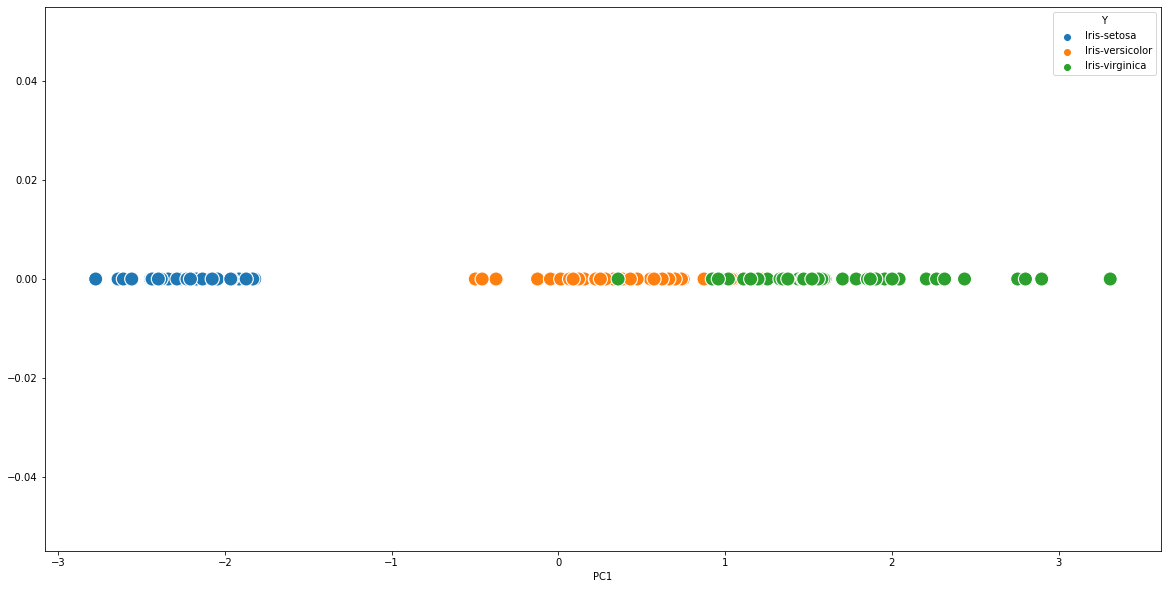

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], 0* len(res), hue=res['Y'], s=200)

C:\Users\Admin\anacondalastone\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

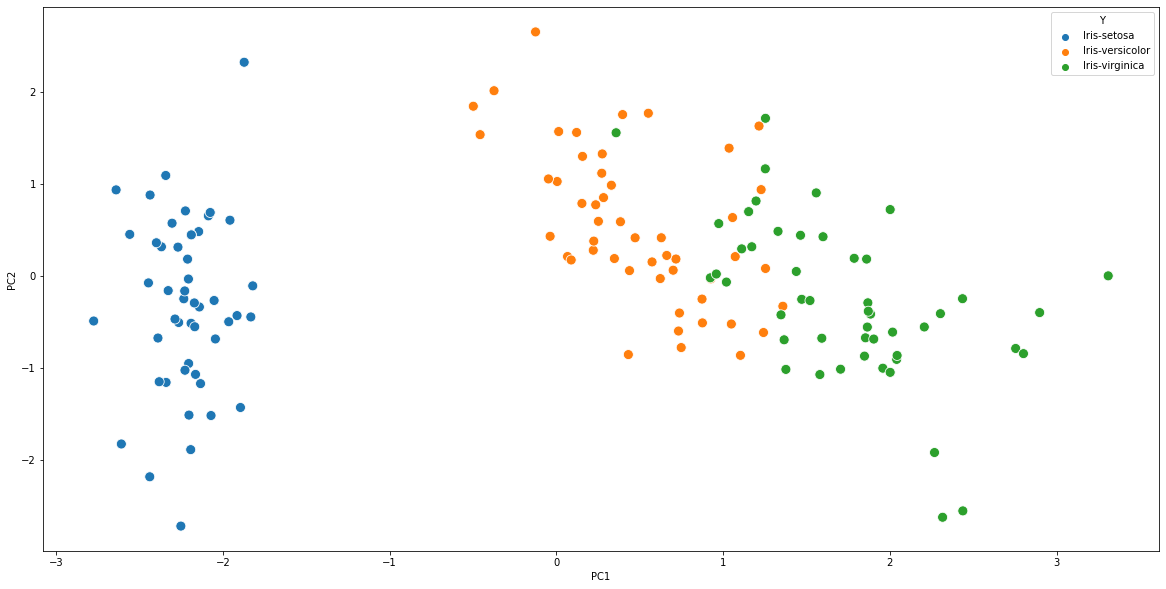

In [34]:
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

In [38]:
df.head(5)

var  skewness  curtosis  entropy  class
0  3.62160    8.6661   -2.8073 -0.44699      0
1  4.54590    8.1674   -2.4586 -1.46210      0
2  3.86600   -2.6383    1.9242  0.10645      0
3  3.45660    9.5228   -4.0112 -3.59440      0
4  0.32924   -4.4552    4.5718 -0.98880      0

The attributes present in the dataset are variance of Wavelet Transformed image (continuous), skewness of Wavelet Transformed image (continuous), curtosis of Wavelet Transformed image (continuous), entropy of image (continuous), class (integer) (0-not authentic, 1-authentic)

In [40]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

The dataset contains total 1372 instances, out of which 762 are of non authentic notes and 610 of authentic notes. 

C:\Users\Admin\anacondalastone\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anacondalastone\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anacondalastone\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

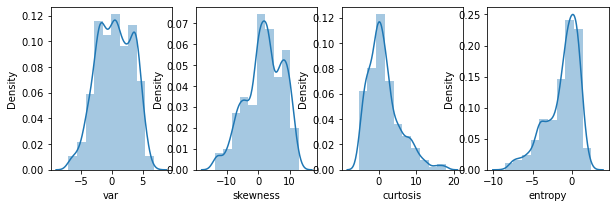

In [41]:
f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(df["var"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["skewness"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["curtosis"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["entropy"],bins=10, ax=ax[3])
#f.savefig('subplot.png')

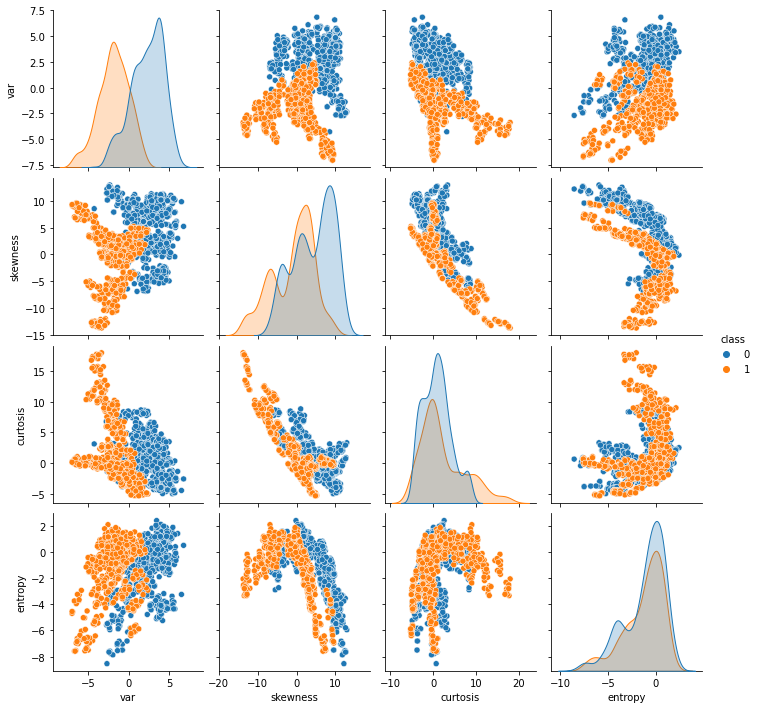

In [42]:
sns.pairplot(df, hue="class")

In [45]:
# split data table into data X and class labels y
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [46]:
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

In [47]:
features = X_sd.T

In [51]:
features

array([[ 1.12180565,  1.44706568,  1.20780971, ..., -1.47235682,
        -1.40669251, -1.04712236],
       [ 1.14945512,  1.06445293, -0.77735215, ..., -2.62164576,
        -1.75647104, -0.43982168],
       [-0.97597007, -0.89503626,  0.12221838, ...,  3.75901744,
         2.552043  ,  0.29861555],
       [ 0.35456135, -0.12876744,  0.61807317, ..., -0.75488418,
        -0.04315848,  1.1364645 ]])

In [52]:
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.00072939,  0.26421811, -0.38112776,  0.2770186 ],
       [ 0.26421811,  1.00072939, -0.78746918, -0.52670474],
       [-0.38112776, -0.78746918,  1.00072939,  0.31907345],
       [ 0.2770186 , -0.52670474,  0.31907345,  1.00072939]])

In [54]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.24877213 -0.75459093  0.60346443  0.06734722]
 [-0.6393234   0.05034037 -0.11596089 -0.75847512]
 [ 0.6127065   0.1534594   0.5096688  -0.58419061]
 [ 0.39238854 -0.6360099  -0.6021806  -0.28089352]]

Eigenvalues 
[2.18149408 1.29409812 0.35163873 0.17568664]


The eigen vectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped. In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigen vectors.

In [55]:
explained_variances = []
for i in range(len(e_vals)):
    explained_variances.append(values[i] / np.sum(e_vals))
 
    print(np.sum(explained_variances), '\n', explained_variances)

0.7320544873055675 
 [0.7320544873055675]
0.9637364051445392 
 [0.7320544873055675, 0.23168191783897166]
1.0007949314758673 
 [0.7320544873055675, 0.23168191783897166, 0.03705852633132801]
1.0059776547244026 
 [0.7320544873055675, 0.23168191783897166, 0.03705852633132801, 0.005182723248535373]


In [56]:
explained_variances[0] + explained_variances[1]

0.9637364051445392

That means by considering eigen vector corresponding to largest eigen value we can retain 73.2% variance, considering eigen vectors corresponding to top 2 eigen values we can retain 96.3 % variance. For data compression purpose, we generally go for 75%, while for visualization we make the dimension to 2 or 3.

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting

In [57]:
projected_1 = X_sd.dot(e_vecs.T[0])
projected_2 = X_sd.dot(e_vecs.T[1])

In [58]:
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

PC1       PC2  Y
0 -1.472805 -1.163917  0
1 -1.639441 -1.093812  0
2  0.513919 -1.324880  0
3 -2.310952 -0.202514  0
4  1.193416  0.024654  0

C:\Users\Admin\anacondalastone\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

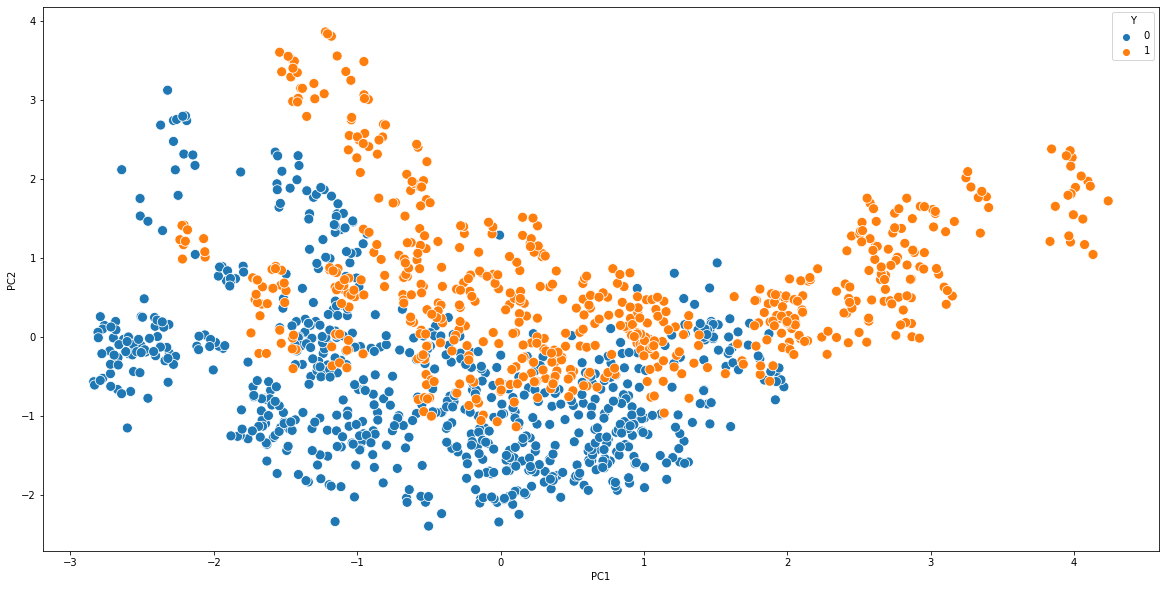

In [59]:
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)

In [21]:
# Generic
import pandas as pd
import numpy as np

# Generate data sets
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [22]:

# Create an array with 3 clusters in 3-dimensions
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=0, cluster_std=[1,2,3], center_box=(10,65))

# Standardize the data
X = StandardScaler().fit_transform(X)

# Prepare the array in a DataFrame
#col_name = [['x1','x2','x3','cluster_labels']]
df = pd.DataFrame(X)
df['cluster_label'] = y

df.head()

0         1         2  cluster_label
0 -0.366353  1.022466  1.166899              2
1 -1.179214  1.318905  1.047407              2
2  0.346441 -1.360488 -0.417740              1
3  0.507115  0.055279 -0.890964              0
4 -0.185192  0.937566  0.930304              2

In [23]:
df = df.rename(columns={0: "x1", 1: "x2",2:"x3"})

In [25]:
# Visualize our data
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(df, x='x1', y='x2', z='x3', color=df['cluster_label'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

There are a couple of moving parts here. When we fit our data to Sklearn’s PCA function, it does all of the heavy liftings to return us a PCA model and the transformed data.

The model gives us access to multitudes of attributes such as eigenvalues, eigenvectors, mean of original data, variance explained, and the list goes on. These are incredibly insightful if we want to understand what the PCA has done with our data.

In [26]:
# split data table into data X and class labels y
X = df.iloc[:,0:3]
y = df.iloc[:,3]

In [27]:
pca = PCA(n_components=3)

In [28]:
# Fit PCA to features
pca.fit_transform(X)

array([[ 1.47494854, -0.36301577,  0.48378777],
       [ 2.03956109, -0.20194309, -0.16286971],
       [-1.20178717,  0.82584511,  0.13835856],
       ...,
       [-0.68889608, -0.64811052, -0.09885092],
       [-0.6421618 , -0.34688619, -0.5227404 ],
       [-0.55043489, -0.73410865, -0.32030237]])

In [29]:
pca.n_components_


3

In [30]:
PC_components = np.arange(pca.n_components_) + 1

One attribute I’d like to highlight is the pca.explained_variance_ratio_ which tells us the proportion of variance explained by each principal component.

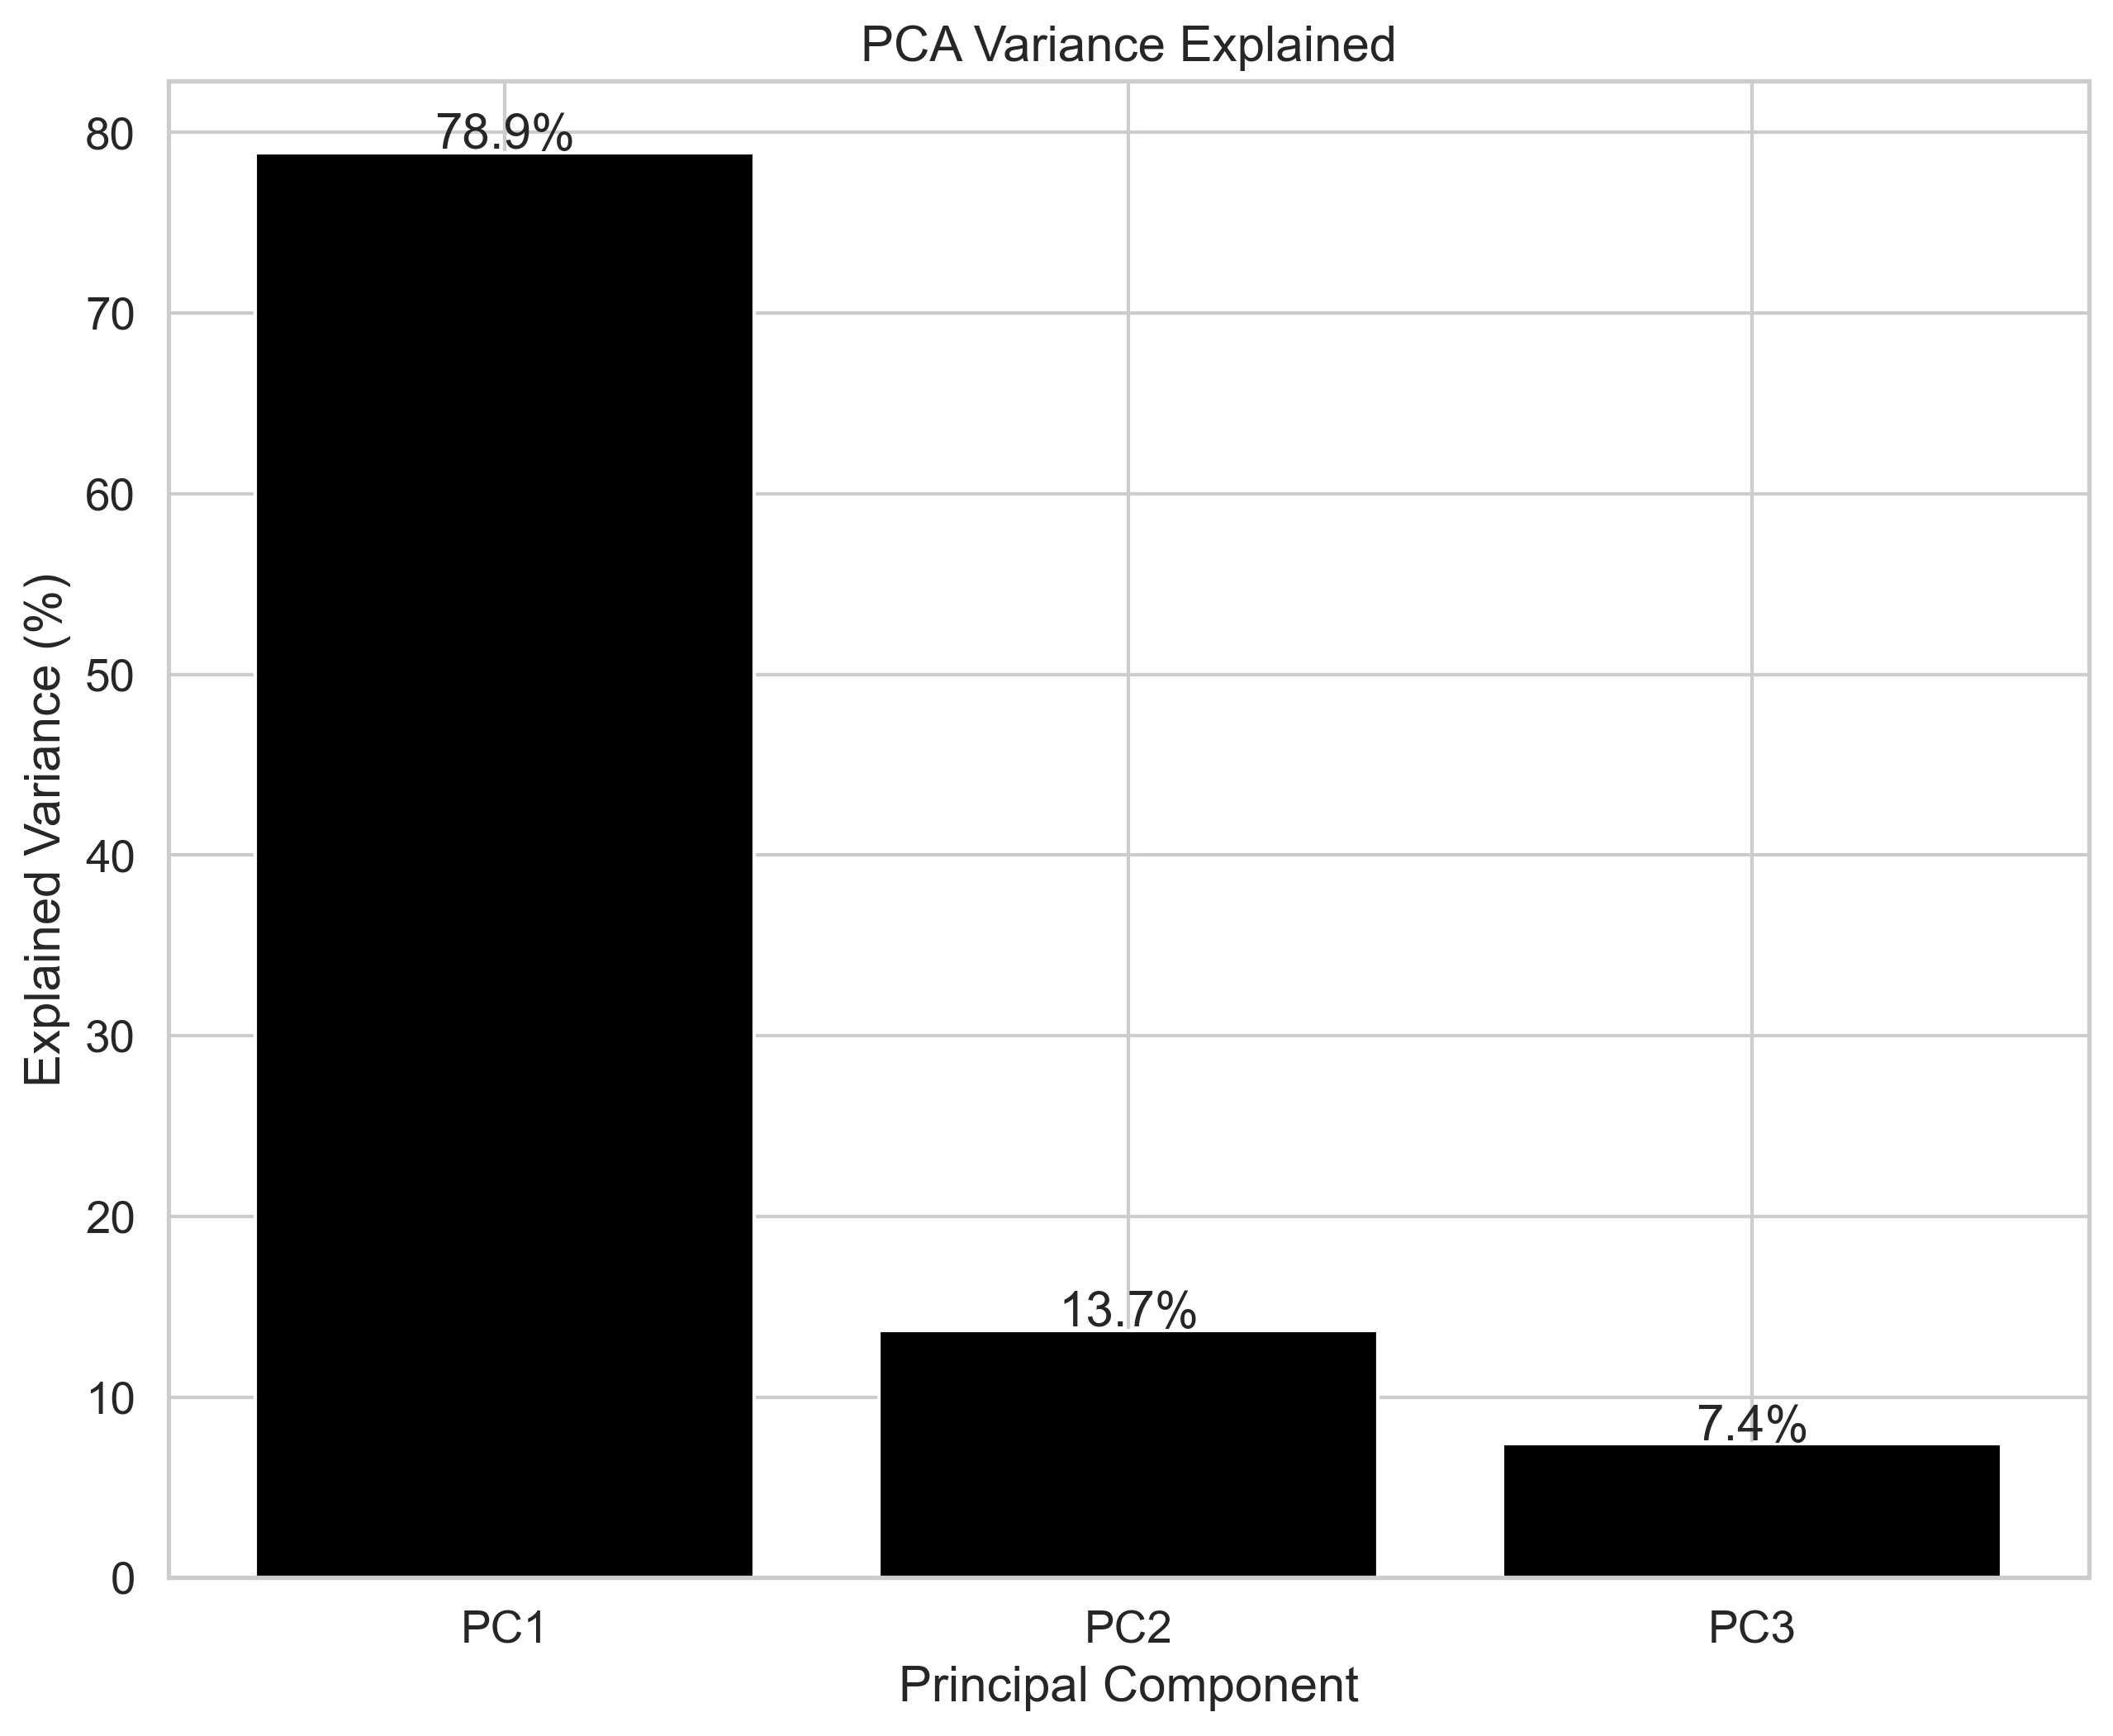

In [32]:
# Plot the explained variance on a bar chart
# Set x and y axis
x_ax=['PC1', 'PC2', 'PC3']
y_ax=pca.explained_variance_ratio_.round(3)*100

# Create a plot
plt.figure(figsize=(10,8), dpi=300)
plt.bar(x=x_ax, height=y_ax, color='black')

# Annotate chart by adding values on top of the bars
for i in range(len(x_ax)):
    plt.text(i,y_ax[i]+0.2,str(y_ax[i].round(3))+'%', ha = 'center')

# Set title for chart and axis        
plt.title(label='PCA Variance Explained', loc='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')

plt.show()

# The chart informs us that using 2 principal components instead of 3 is fine because they can capture 90%+ of the variance.

# On top of that, we can also look at the combinations of variables that created each principal component with pca.components_**2. We could use a heat map to showcase this.

In [34]:
col_name = ['x0','x1','x2']

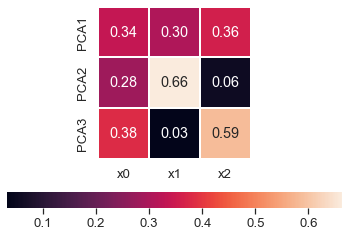

In [35]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In our example, we can see that PCA1 is made from 34% of x0, 30% of x1, and 36% of x2. PCA2 is primarily dominated by x1.

There are a lot more useful attributes that are made available by Sklearn. For those who are interested, I recommend having a look at the attributes section of PCA on Sklearn documentation.

In [36]:
pca_array = pca.fit_transform(X)

In [37]:
df_pca = pd.DataFrame(data=pca_array)

In [38]:
df_pca['label'] = y

In [39]:
df_pca

0         1         2  label
0    1.474949 -0.363016  0.483788      2
1    2.039561 -0.201943 -0.162870      2
2   -1.201787  0.825845  0.138359      1
3   -0.797182 -0.524210 -0.379135      0
4    1.181292 -0.445752  0.429704      2
..        ...       ...       ...    ...
995 -0.734918 -0.629466 -0.464457      0
996  1.948273  0.123853 -0.120654      2
997 -0.688896 -0.648111 -0.098851      0
998 -0.642162 -0.346886 -0.522740      0
999 -0.550435 -0.734109 -0.320302      0

[1000 rows x 4 columns]

In [40]:
df_pca = df_pca.rename(columns={0: "x1", 1: "x2",2:"x3"})

In [41]:
df_pca.head()

x1        x2        x3  label
0  1.474949 -0.363016  0.483788      2
1  2.039561 -0.201943 -0.162870      2
2 -1.201787  0.825845  0.138359      1
3 -0.797182 -0.524210 -0.379135      0
4  1.181292 -0.445752  0.429704      2

In [42]:
# Visualize our data
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(df_pca, x='x1', y='x2', z='x3', color=df_pca['label'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

C:\Users\Admin\anacondalastone\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



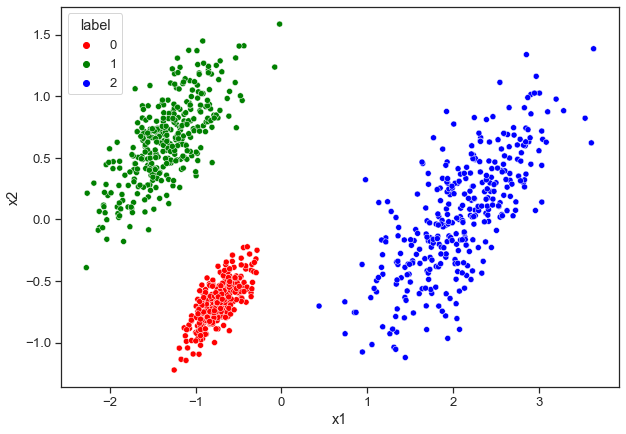

In [43]:
# Plot Principal Component
_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.scatterplot(df_pca['x1'],df_pca['x2'], hue=df_pca['label'], palette=['red', 'green', 'blue'])

In [44]:
X.shape

(1000, 3)

In [45]:
pca = PCA(n_components=2)

In [46]:
# Fit PCA to features
pca.fit_transform(X)

array([[ 1.47494854, -0.36301577],
       [ 2.03956109, -0.20194309],
       [-1.20178717,  0.82584511],
       ...,
       [-0.68889608, -0.64811052],
       [-0.6421618 , -0.34688619],
       [-0.55043489, -0.73410865]])

In [47]:
pca.n_components_

2

In [ ]:
col_name = ['x0','x1']

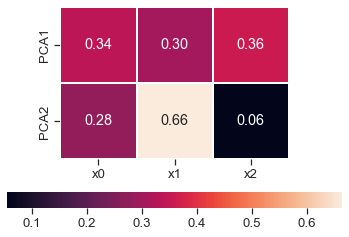

In [48]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [49]:
pca_array = pca.fit_transform(X)

In [50]:
df_pca = pd.DataFrame(data=pca_array)

In [51]:
df_pca['label'] = y

In [52]:
df_pca

0         1  label
0    1.474949 -0.363016      2
1    2.039561 -0.201943      2
2   -1.201787  0.825845      1
3   -0.797182 -0.524210      0
4    1.181292 -0.445752      2
..        ...       ...    ...
995 -0.734918 -0.629466      0
996  1.948273  0.123853      2
997 -0.688896 -0.648111      0
998 -0.642162 -0.346886      0
999 -0.550435 -0.734109      0

[1000 rows x 3 columns]

In [53]:
df_pca = df_pca.rename(columns={0: "x1", 1: "x2"})

In [54]:
df_pca

x1        x2  label
0    1.474949 -0.363016      2
1    2.039561 -0.201943      2
2   -1.201787  0.825845      1
3   -0.797182 -0.524210      0
4    1.181292 -0.445752      2
..        ...       ...    ...
995 -0.734918 -0.629466      0
996  1.948273  0.123853      2
997 -0.688896 -0.648111      0
998 -0.642162 -0.346886      0
999 -0.550435 -0.734109      0

[1000 rows x 3 columns]

In [111]:
import pandas as pd

In [113]:
data=pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Unsupervised learning/fashion-mnist_train.csv')
data

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0        30        43   
3           0  ...         3         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             1         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[60000 rows x 785 columns]

Here we see that the first column label in which there is a number like(2,9,6,0,3……) these are the label of different cloths as we see in the dataset .Here we train this data as y .And these columns pixel1 to pixel784 are the columns which shows the 784 pixel of a particular image where each column is one pixel.Here in this model we train this data as X.

In [114]:
X=data.iloc[:,1:].values

y=data.iloc[:,0].values

In [115]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
       214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 217, 22

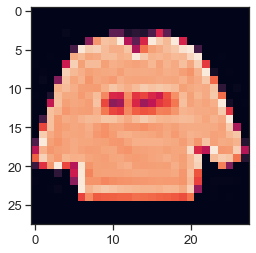

In [117]:
import matplotlib.pyplot as plt
a=X[0].reshape(28,28) 
plt.imshow(a)
# Here we grab 1st image from X and reshape into (28,28) because our data is in 28 *28 resolution then we put in plt.imshow(a)

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Let's apply PCA into the dataset. 

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Here we have new X_train and X_test in which all the value of feature or columns are between the 0 and 1.

Then if we see the X_train_new or X_test _new there are same number of rows as previously but the number of columns in X_train_new and X_test_new is equal to the n_components (let suppose you put n_components=50 , it means PCA automatic take best 50 combinations of columns which explain the maximum variance of my previous data.

In [121]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50) 
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.fit_transform(X_test)

In [122]:
print(X_train.shape)
print(X_train_new.shape)

(48000, 784)
(48000, 50)


In [124]:
Variance_ratio = pca.explained_variance_ratio_
Variance_ratio

array([0.2214491 , 0.14296104, 0.05503745, 0.05063177, 0.03961874,
       0.0307338 , 0.02798109, 0.02277182, 0.01680703, 0.01287281,
       0.01176976, 0.00955384, 0.00913252, 0.00865836, 0.00757012,
       0.00726945, 0.00663778, 0.00643558, 0.00616959, 0.00586593,
       0.00541917, 0.0051775 , 0.00477372, 0.00458641, 0.00451691,
       0.00441694, 0.00417826, 0.0040282 , 0.00391589, 0.00388759,
       0.00375886, 0.00365976, 0.00357114, 0.00341805, 0.00333366,
       0.00320608, 0.00315738, 0.00302318, 0.00298439, 0.00285299,
       0.00283219, 0.00273987, 0.00265507, 0.00259779, 0.00247807,
       0.00241475, 0.002356  , 0.00230368, 0.00223326, 0.00221769])

In [125]:
df_pca = pd.DataFrame(data=Variance_ratio)

In [129]:
df_pca = df_pca.T

In [130]:
df_pca.columns = [x for x in range(1, 51)] 

In [131]:
#number of components and the explain variance of each. 
df_pca

1         2         3         4         5         6         7   \
0  0.221449  0.142961  0.055037  0.050632  0.039619  0.030734  0.027981   

         8         9         10  ...        41       42        43        44  \
0  0.022772  0.016807  0.012873  ...  0.002832  0.00274  0.002655  0.002598   

         45        46        47        48        49        50  
0  0.002478  0.002415  0.002356  0.002304  0.002233  0.002218  

[1 rows x 50 columns]

In [167]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=6)

In [168]:
clf.fit(X_train_new,y_train)

KNeighborsClassifier(n_neighbors=6)

In [169]:
#much faster to predict with only 50 columns. 
y_pred_new=clf.predict(X_test_new)

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
accuracy_score(y_test,y_pred_new)

0.66725

In [180]:
from sklearn import datasets
wine_data = datasets.load_wine(as_frame=True)
df = wine_data.data

In [181]:
df.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0  
5                          2.85   1450.0  
6                          3.58   1290.0  
7                          3.58   1295.0  
8                          2.85   1045.0  
9                          3.55   1045.0

In [182]:
print(df.shape)

(178, 13)


In [183]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Step 2 – Preprocess the Dataset
 

As a next step, let's preprocess the dataset. The features are all on different scales. To bring them all to a common scale, we’ll use the StandardScaler 

In [184]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

Let’s instantiate a PCA object by passing in the number of principal components n_components to the constructor. 

The number of principal components is the number of dimensions that you’d like to reduce the feature space to. Here, we set the number of components to 3.

In [197]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x = pca.fit_transform(scaled_df)

In [198]:
x.shape

(178, 3)

In [201]:
print(pca.components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]


In [202]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

In [188]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969])

the total of PCA exaplains 66.5% of the dataset. 

In [190]:
import numpy as np
nums = np.arange(14)

In [191]:
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scaled_df)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

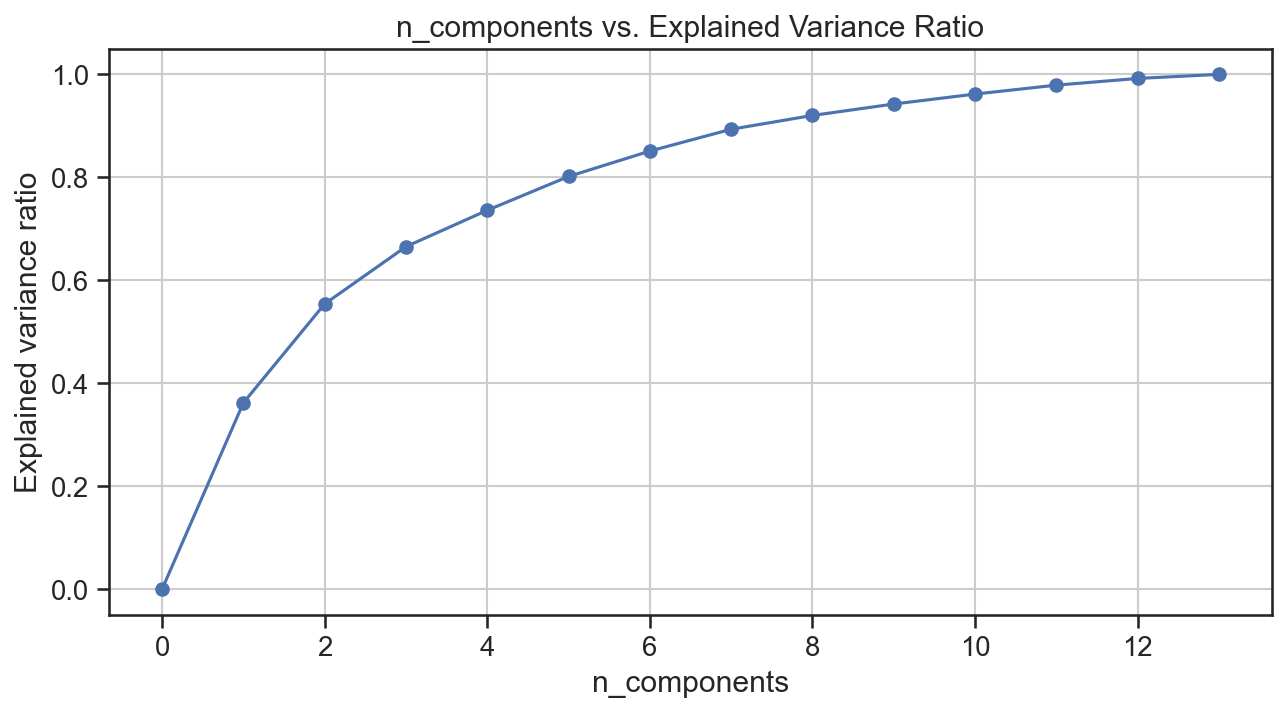

In [193]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

When we use all the 13 components, the explained_variance_ratio_ is 1.0 indicating that we’ve captured 100% of the variance in the dataset. 

In this example, we see that with 6 principal components, we'll be able to capture more than 80% of variance in the input dataset.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [56]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, 
                  columns=diabetes.feature_names)
 
df.head(6)

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
5 -0.076395 -0.041176 -0.096346

In [57]:
scaler = StandardScaler()
 
scaler.fit(df)
 
Diabetes_scaled = scaler.transform(df)

In [58]:
dataframe_scaled = pd.DataFrame(data=Diabetes_scaled, 
                                columns=diabetes.feature_names)
 
dataframe_scaled.head(6)

age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   
5 -1.948811 -0.938537 -0.855583 -0.408741 -1.450445 -1.666931  0.867796   

         s4        s5        s6  
0 -0.054499  0.418531 -0.370989  
1 -0.830301 -1.436589 -1.938479  
2 -0.054499  0.060156 -0.545154  
3  0.721302  0.476983 -0.196823  
4 -0.054499 -0.672502 -0.980568  
5 -1.606102 -0.865679 -2.025562

Step 3: Ideal Number of Components
First, we should choose the ideal number of components before interpreting the results. One alternative is to conduct a PCA for all or an arbitrarily large number of components, then visualize the percentage of explained variance or the eigenvalues per component using a scree plot. Based on the graph, the optimal number can be selected. Let’s run our PCA for ten components!

In [59]:
dataframe_scaled.shape

(442, 10)

In [60]:
pca = PCA(n_components=10)
 
dataframe_pca = pca.fit_transform(Diabetes_scaled)

In [61]:
dataframe_pca.shape

(442, 10)

In [62]:
prop_var = pca.explained_variance_ratio_

In [63]:
pca.n_components_

10

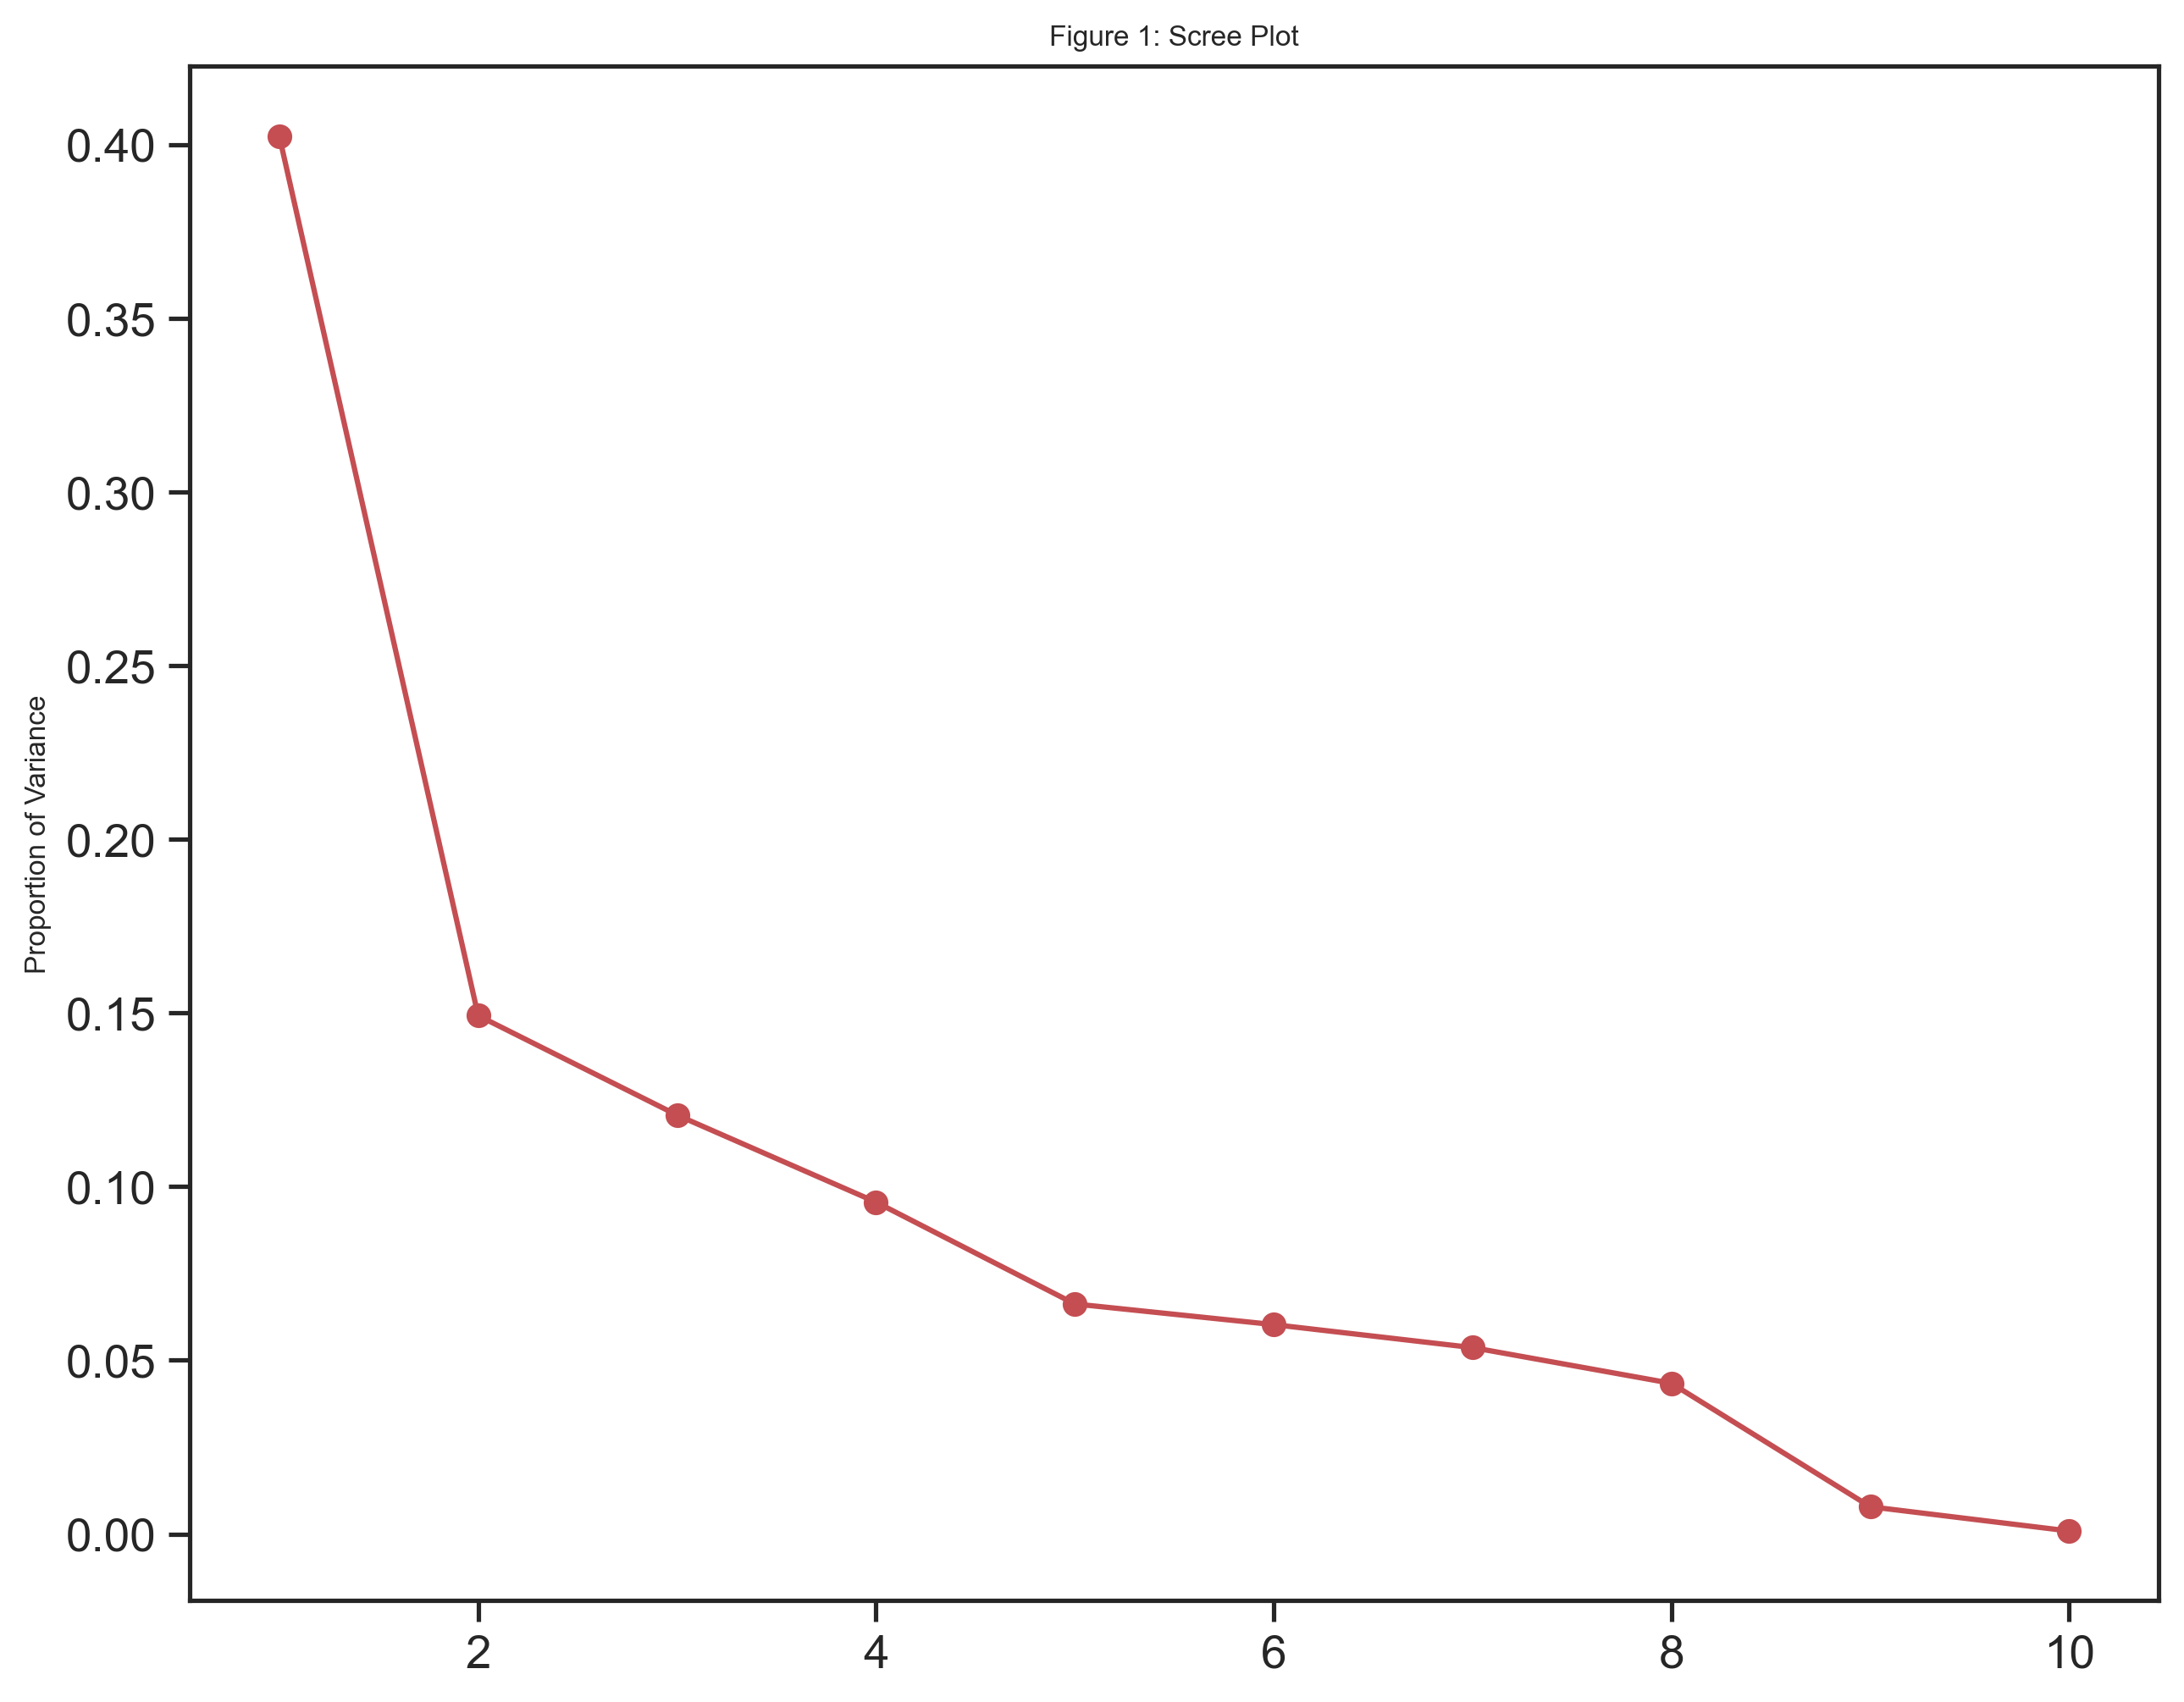

In [65]:
PC_numbers = np.arange(pca.n_components_) + 1
plt.figure(figsize=(10,8), dpi=300)
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [213]:
np.cumsum(pca.explained_variance_ratio_)

array([0.40242108, 0.55165304, 0.67224967, 0.76779731, 0.83401545,
       0.89428716, 0.94794372, 0.99131192, 0.99914393, 1.        ])

4 principal components explain 76% of the data. 

In [216]:
pca = PCA(n_components=4)
PC = pca.fit_transform(Diabetes_scaled)

In [217]:
PC.shape

(442, 4)

In [218]:
pca_diabetes = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2','PC3','PC4'])
 
pca_diabetes.head(6)

PC1       PC2       PC3       PC4
0  0.587199 -1.946832  0.589205 -0.082816
1 -2.831625  1.372082  0.027930 -0.470008
2  0.272129 -1.634901  0.739244 -0.791492
3  0.049281  0.382278 -2.013032  1.373216
4 -0.756421  0.811960 -0.057238 -0.137495
5 -3.966321 -0.381060 -0.337382  0.920176

In [219]:
pca_diabetes.shape

(442, 4)

In [1]:
import pandas as pd # for data manipulation
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
from sklearn.preprocessing import StandardScaler # for data standardization
from sklearn.decomposition import PCA # for PCA analysis

In [2]:
# Read in the weather data csv
df=pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/weatherAUS.csv', encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())

# Create a flag for RainToday and RainTomorrow
# Note, RainTomorrowFlag would be used as a target variable for prediction model
df['RainTodayFlag']=df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df['RainTomorrowFlag']=df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

C:\Users\Admin\AppData\Local\Temp/ipykernel_32532/3708638416.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


In [3]:
df.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.469824  7.624853   
1  2008-12-02   Albury      7.4     25.1       0.0     5.469824  7.624853   
2  2008-12-03   Albury     12.9     25.7       0.0     5.469824  7.624853   
3  2008-12-04   Albury      9.2     28.0       0.0     5.469824  7.624853   
4  2008-12-05   Albury     17.5     32.3       1.0     5.469824  7.624853   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure9am  Pressure3pm  \
0           W           44.0          W  ...      1007.7       1007.1   
1         WNW           44.0        NNW  ...      1010.6       1007.8   
2         WSW           46.0          W  ...      1007.6       1008.7   
3          NE           24.0         SE  ...      1017.6       1012.8   
4           W           41.0        ENE  ...      1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0  8.000000  4.503167     16.9     21.8         No            No   
1  4.437189  4.503167     17.2     24.3         No            No   
2  4.437189  2.000000     21.0     23.2         No            No   
3  4.437189  4.503167     18.1     26.5         No            No   
4  7.000000  8.000000     17.8     29.7         No            No   

   RainTodayFlag  RainTomorrowFlag  
0              0                 0  
1              0                 0  
2              0                 0  
3              0                 0  
4              0                 0  

[5 rows x 25 columns]

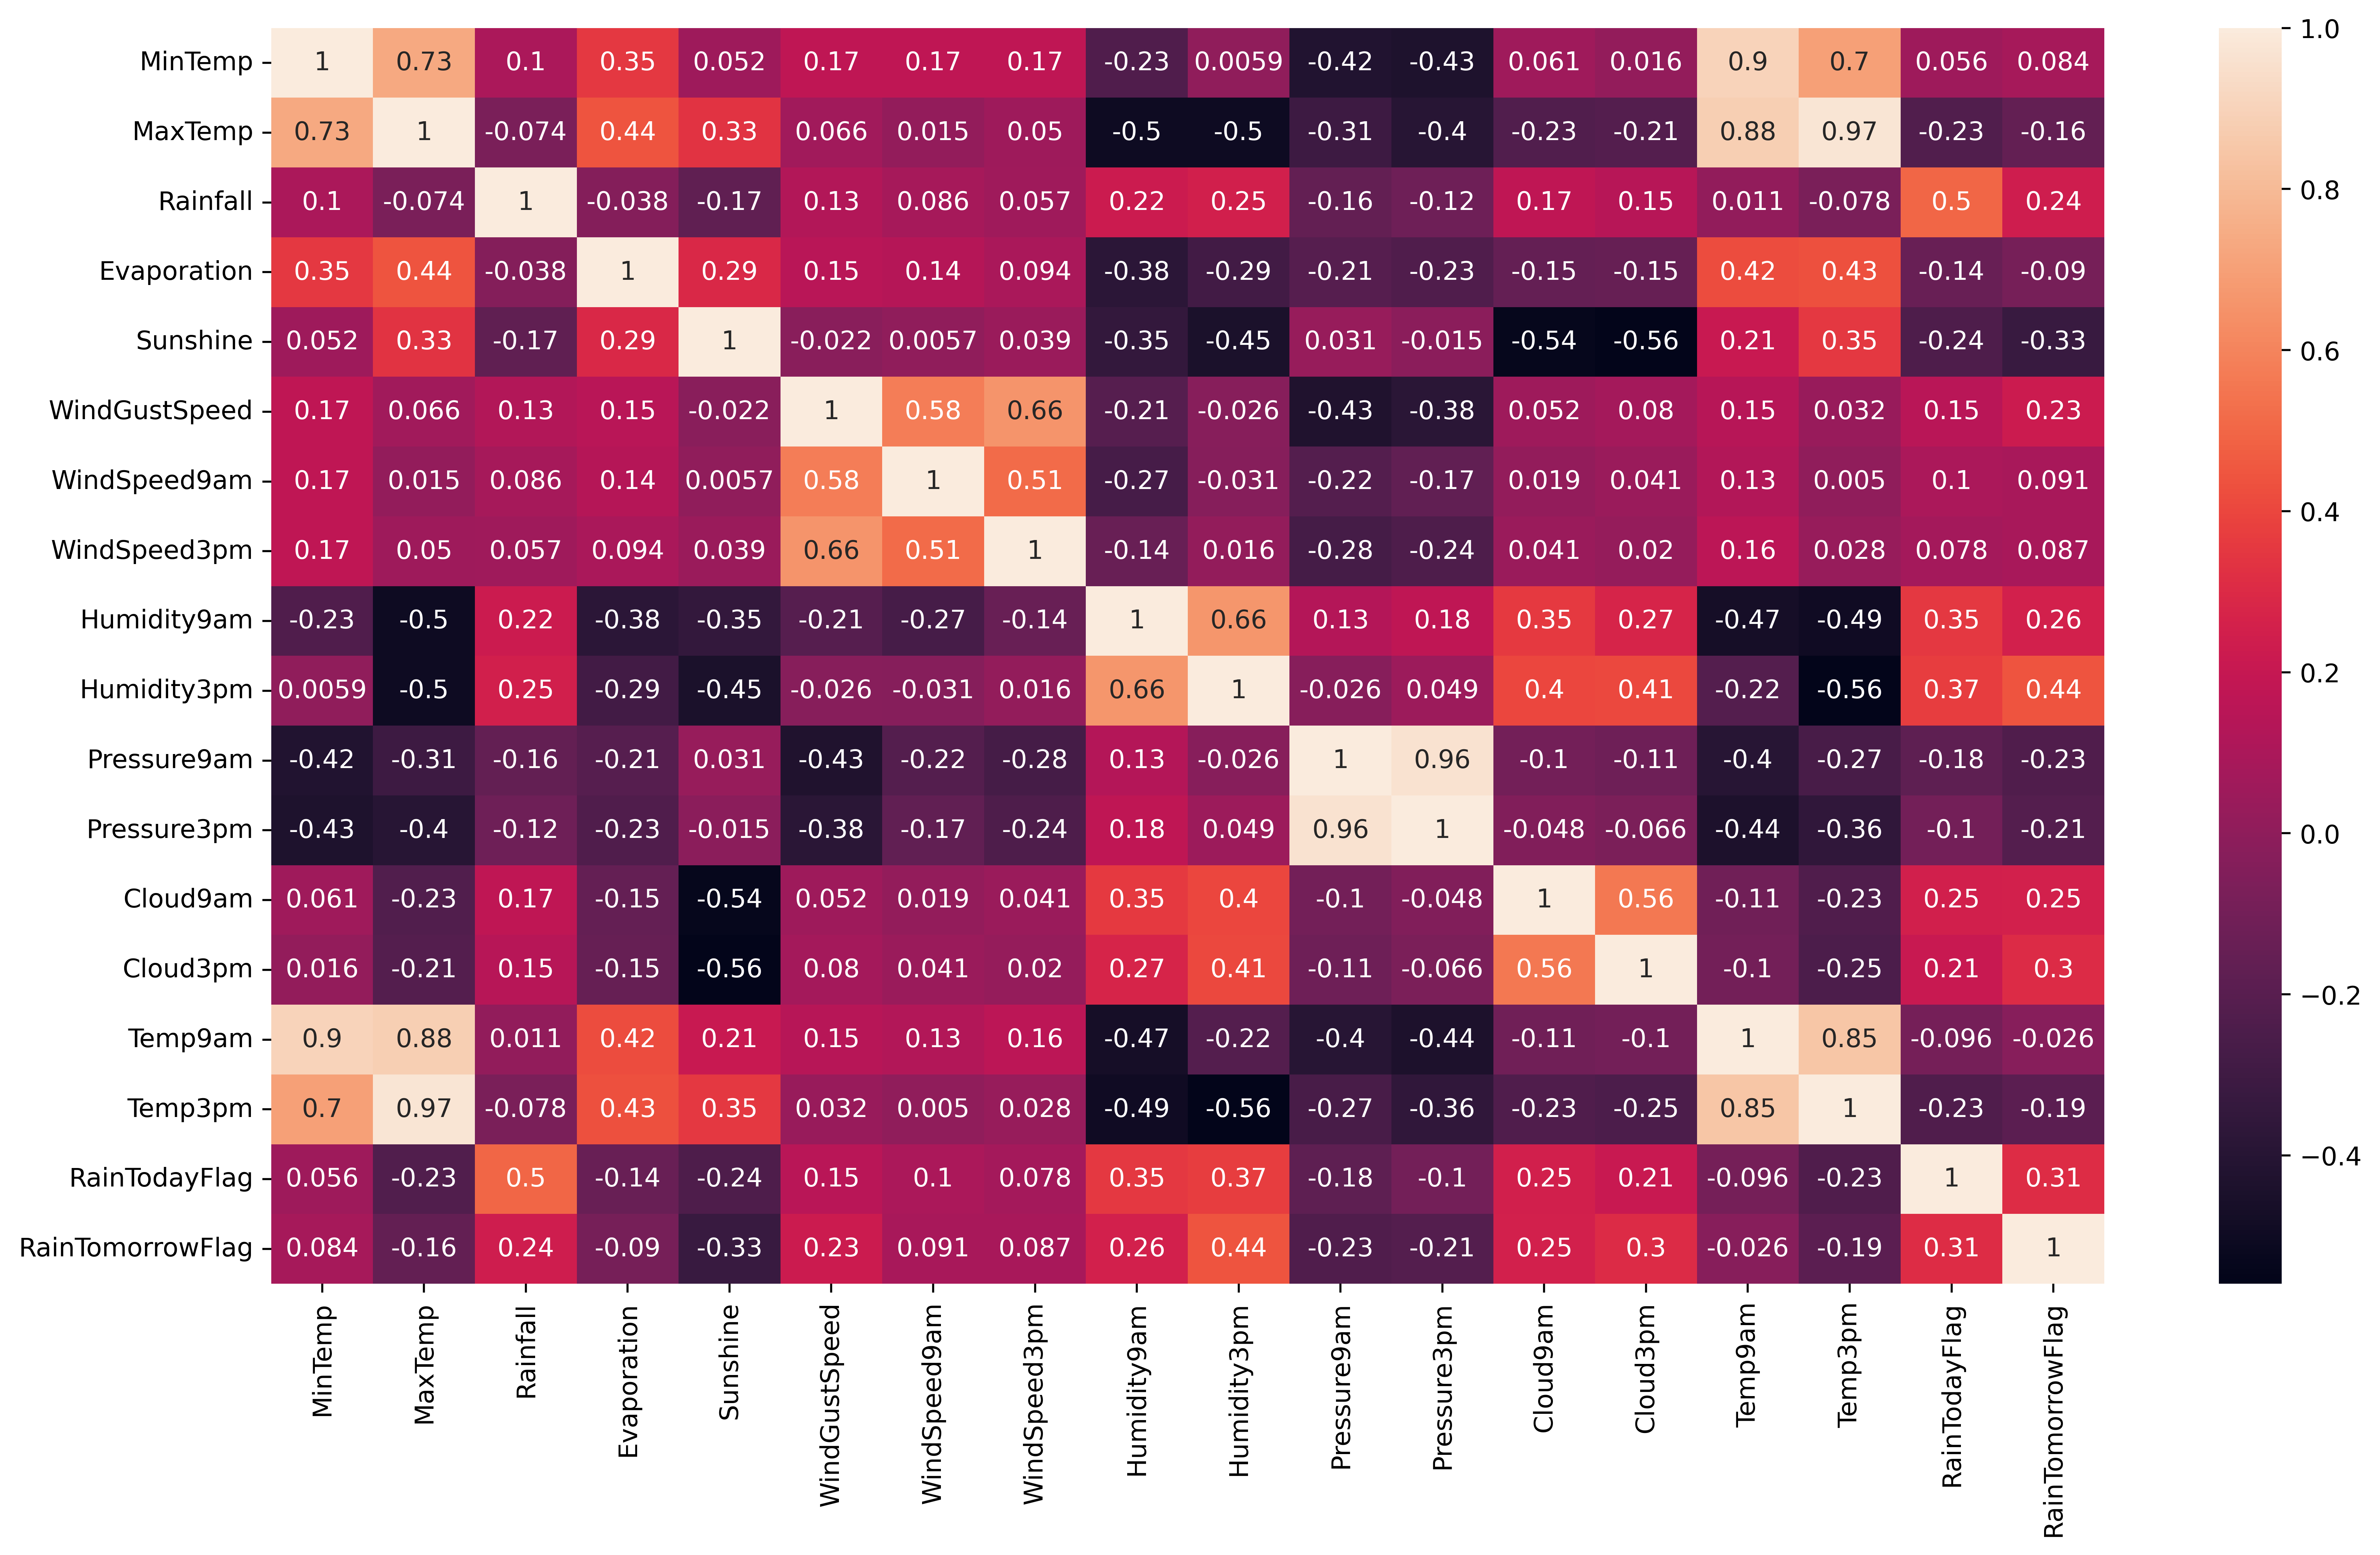

In [4]:
# Create a correlation matrix
corrMatrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16,9), dpi=500)
sns.heatmap(corrMatrix, annot=True) 
plt.show()

As we can see, we have plenty of highly correlated variables. For example, MaxTemp is highly negatively correlated to Humidity at 9 am and 3 pm. At the same time, WindGustSpeed is highly positively correlated to WindSpeed at 9 am and 3 pm.



Data Standardization
Let’s now standardize the data, which gives us an array of features, each with a mean of 0 and a standard deviation of 1.

In [5]:
# Select all numerical features (17) with an exception of a target variable (RainTomorrowFlag)
X=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
      'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
      'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 
      'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag'
     ]]

In [6]:
# Get scaler
scaler=StandardScaler()

# Perform standard scaling 
X_std=scaler.fit_transform(X)

In [7]:
X_std.shape

(142193, 17)

In [8]:
df.shape

(142193, 25)

We have 25 features in the dataset and we've chosen only numerical features for X values (17)

In [9]:
# Select the model and its parameters
pca = PCA(n_components=17)

# Fit the model
X_trans=pca.fit_transform(X_std)

In [10]:
X_trans.shape

(142193, 17)

In [11]:
import numpy as np

In [12]:
# Print the results
print('*************** PCA Summary ***************')
print('No. of components: ', pca.n_components_)
print('No. of samples: ', pca.n_samples_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)
print('Cumulative Explained variance ratio: ', np.cumsum(pca.explained_variance_ratio_))

*************** PCA Summary ***************
No. of components:  17
No. of samples:  142193
Explained variance ratio:  [0.30473734 0.19327251 0.11661159 0.07343159 0.06477021 0.04686651
 0.04244543 0.03124602 0.0283     0.02562401 0.02453296 0.01950429
 0.01702357 0.00621854 0.00223226 0.0017376  0.00144558]
Cumulative Explained variance ratio:  [0.30473734 0.49800985 0.61462143 0.68805302 0.75282324 0.79968975
 0.84213518 0.8733812  0.90168119 0.9273052  0.95183816 0.97134245
 0.98836602 0.99458456 0.99681682 0.99855442 1.        ]


# We can see that with 5 components we have 75% of the dataset variance. 

The explained variance ratio tells us how much of the variance has been captured by each subsequent principal component. Let’s plot it on a bar chart so we can inspect it more easily.

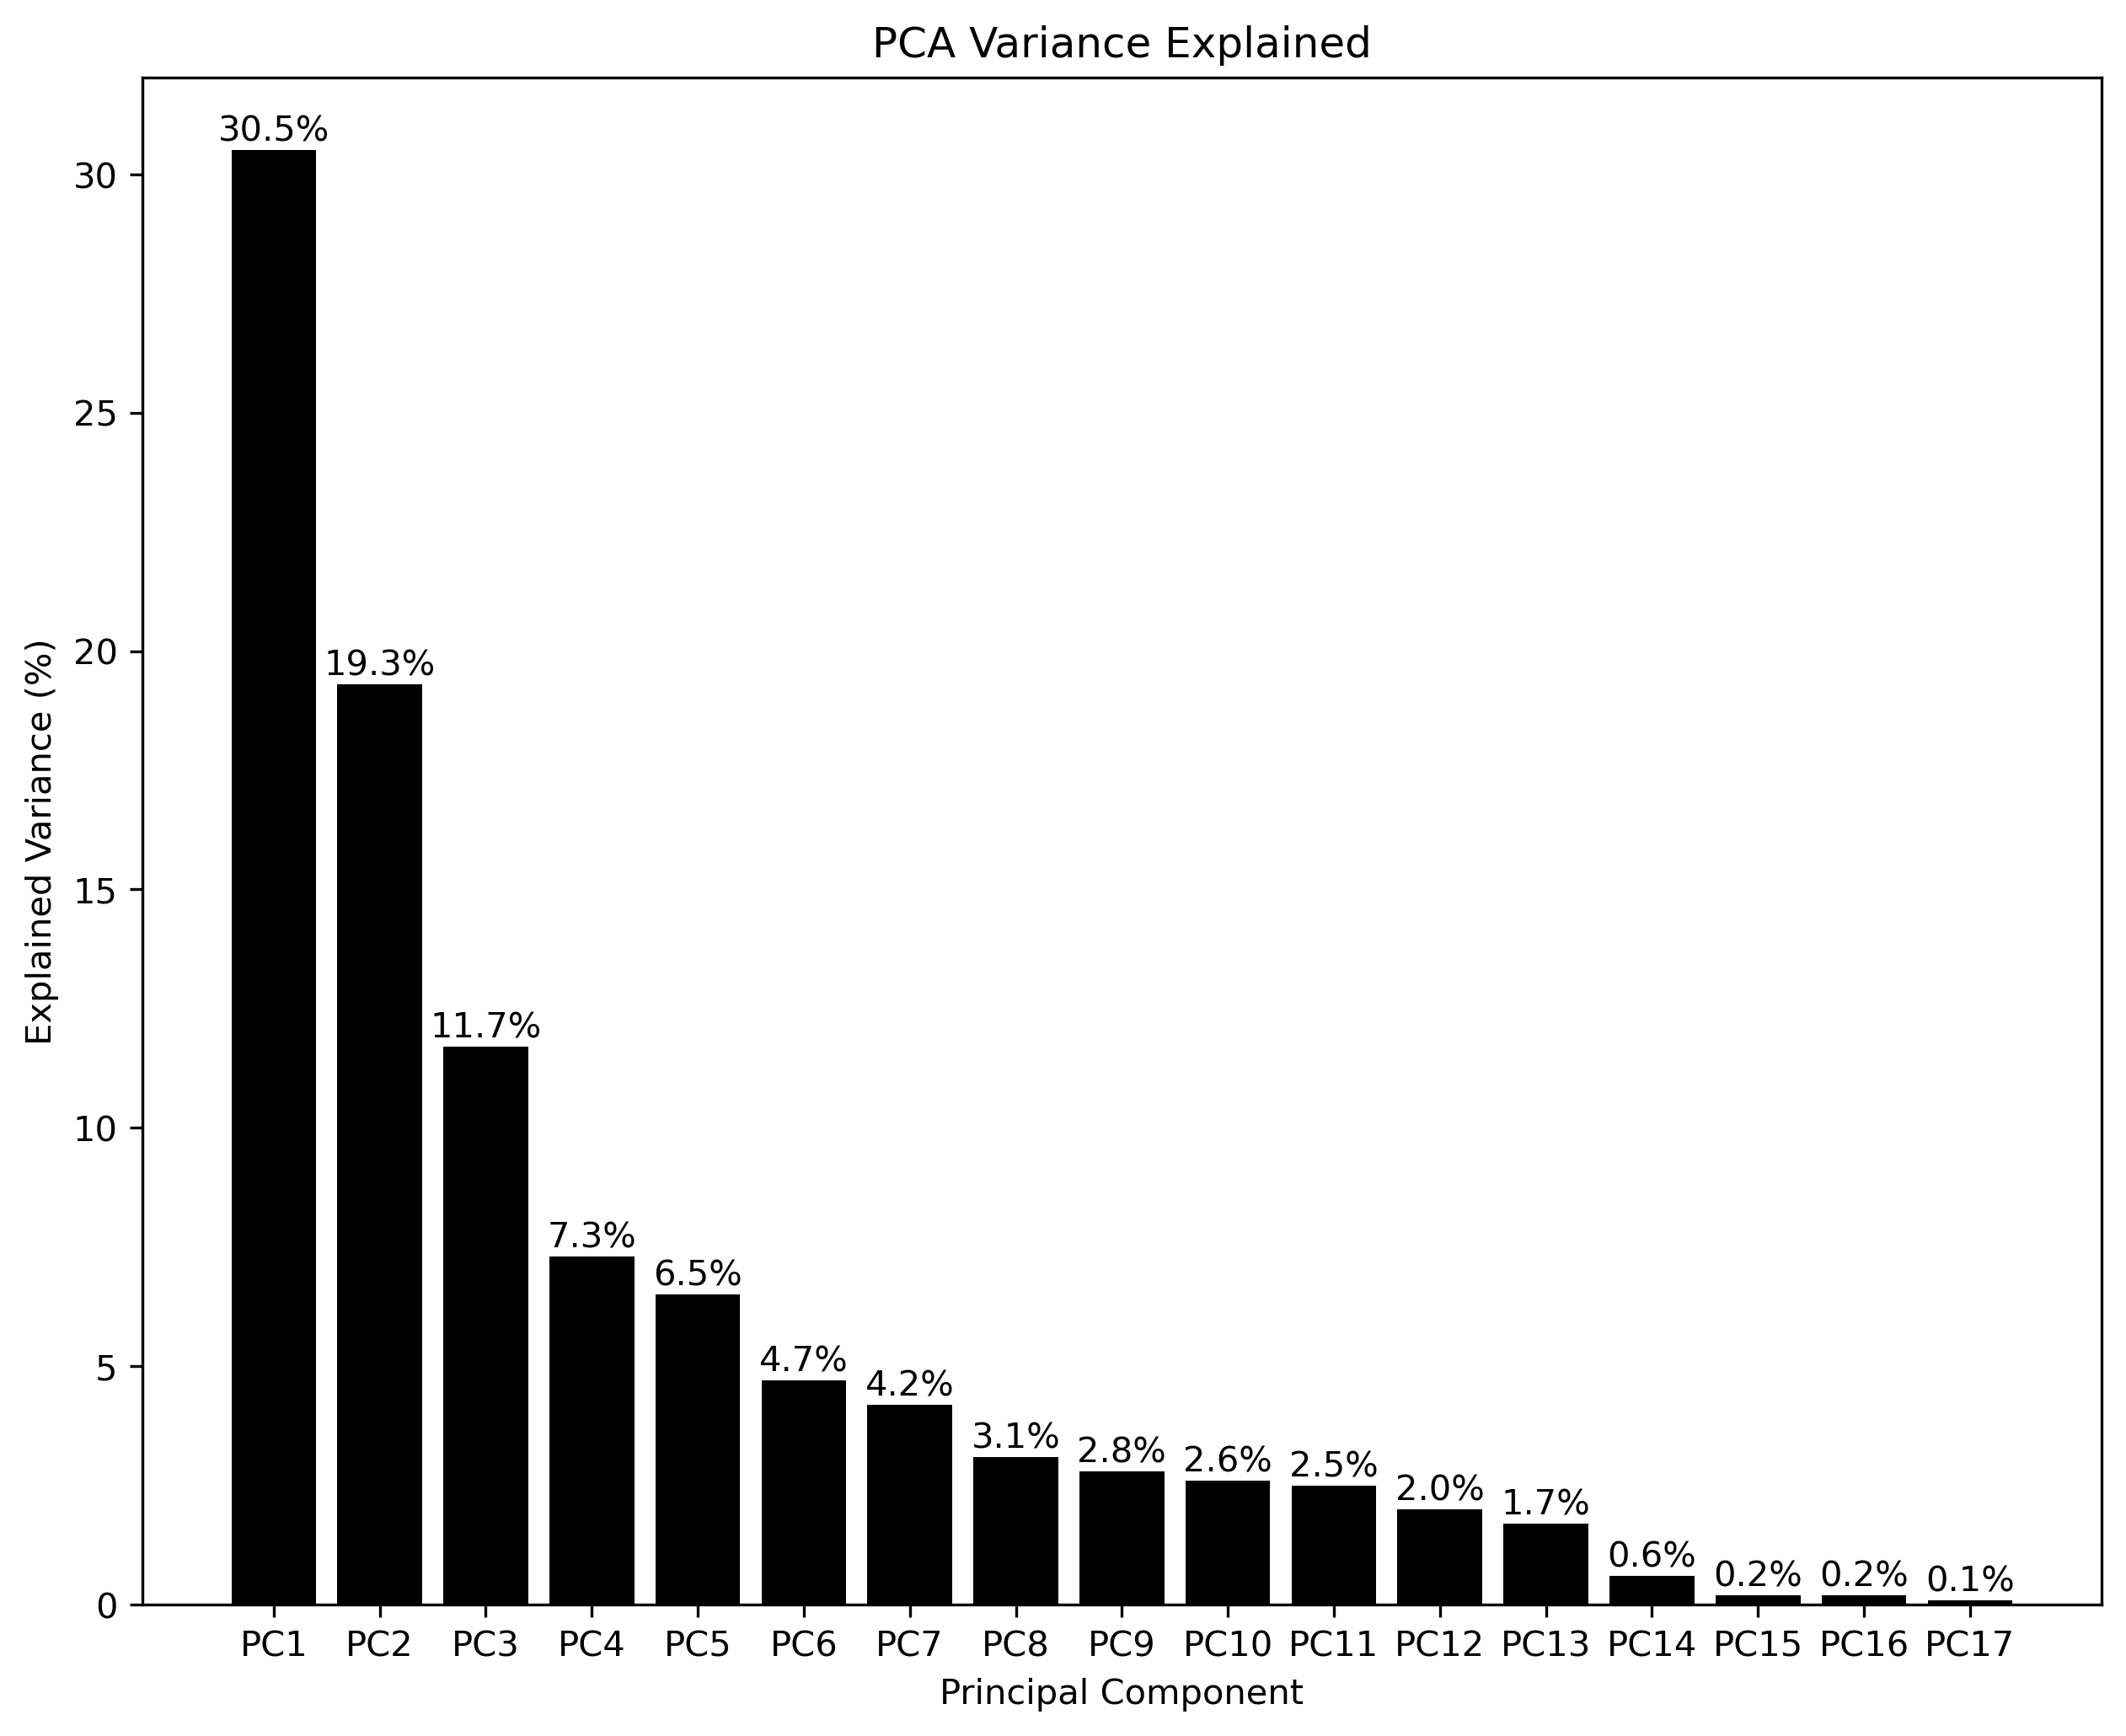

In [13]:
# Plot the explained variance on a bar chart
# Set x and y axis
x_ax=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
     'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']
y_ax=pca.explained_variance_ratio_.round(3)*100

# Create a plot
plt.figure(figsize=(10,8), dpi=300)
plt.bar(x=x_ax, height=y_ax, color='black')

# Annotate chart by adding values on top of the bars
for i in range(len(x_ax)):
    plt.text(i,y_ax[i]+0.2,str(y_ax[i].round(3))+'%', ha = 'center')

# Set title for chart and axis        
plt.title(label='PCA Variance Explained', loc='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')

plt.show()

The plot enables us to easily see that the majority of variance is captured just by the first few PCs:

PC1 alone captures 31% of the variance
Top 2 PCs capture 50% of the variance
Top 6 PCs capture 80% of the variance
Top 11 PCs capture 95% of the variance
Top 13 PCs capture 99% of the variance
So, if you are building a prediction model, you can definitely make the training more efficient with little or no loss to its performance. You can achieve that by reducing the number of dimensions selecting only a few top principal components.

Note, you can do the selection of the top few components by simply taking a subset of the X_trans array, or rerunning the PCA analysis by putting n_components=6 or whatever number of dimensions you want to keep.

Despite losing some amount of data variance by reducing the number of dimensions, it often results in better model performance.

While this may sound counterintuitive, it is worth remembering that some prediction algorithms suffer from the curse of dimensionality, meaning that too many dimensions make the data sparse and harder to model. Hence, reducing the number of dimensions helps to identify the connections between the attributes leading to improved performance.

Note, you can do the selection of the top few components by simply taking a subset of the X_trans array, or rerunning the PCA analysis by putting n_components=6 or whatever number of dimensions you want to keep.

In [14]:
# Select the model and its parameters
pca = PCA(n_components=5)

# Fit the model
X_trans=pca.fit_transform(X_std)

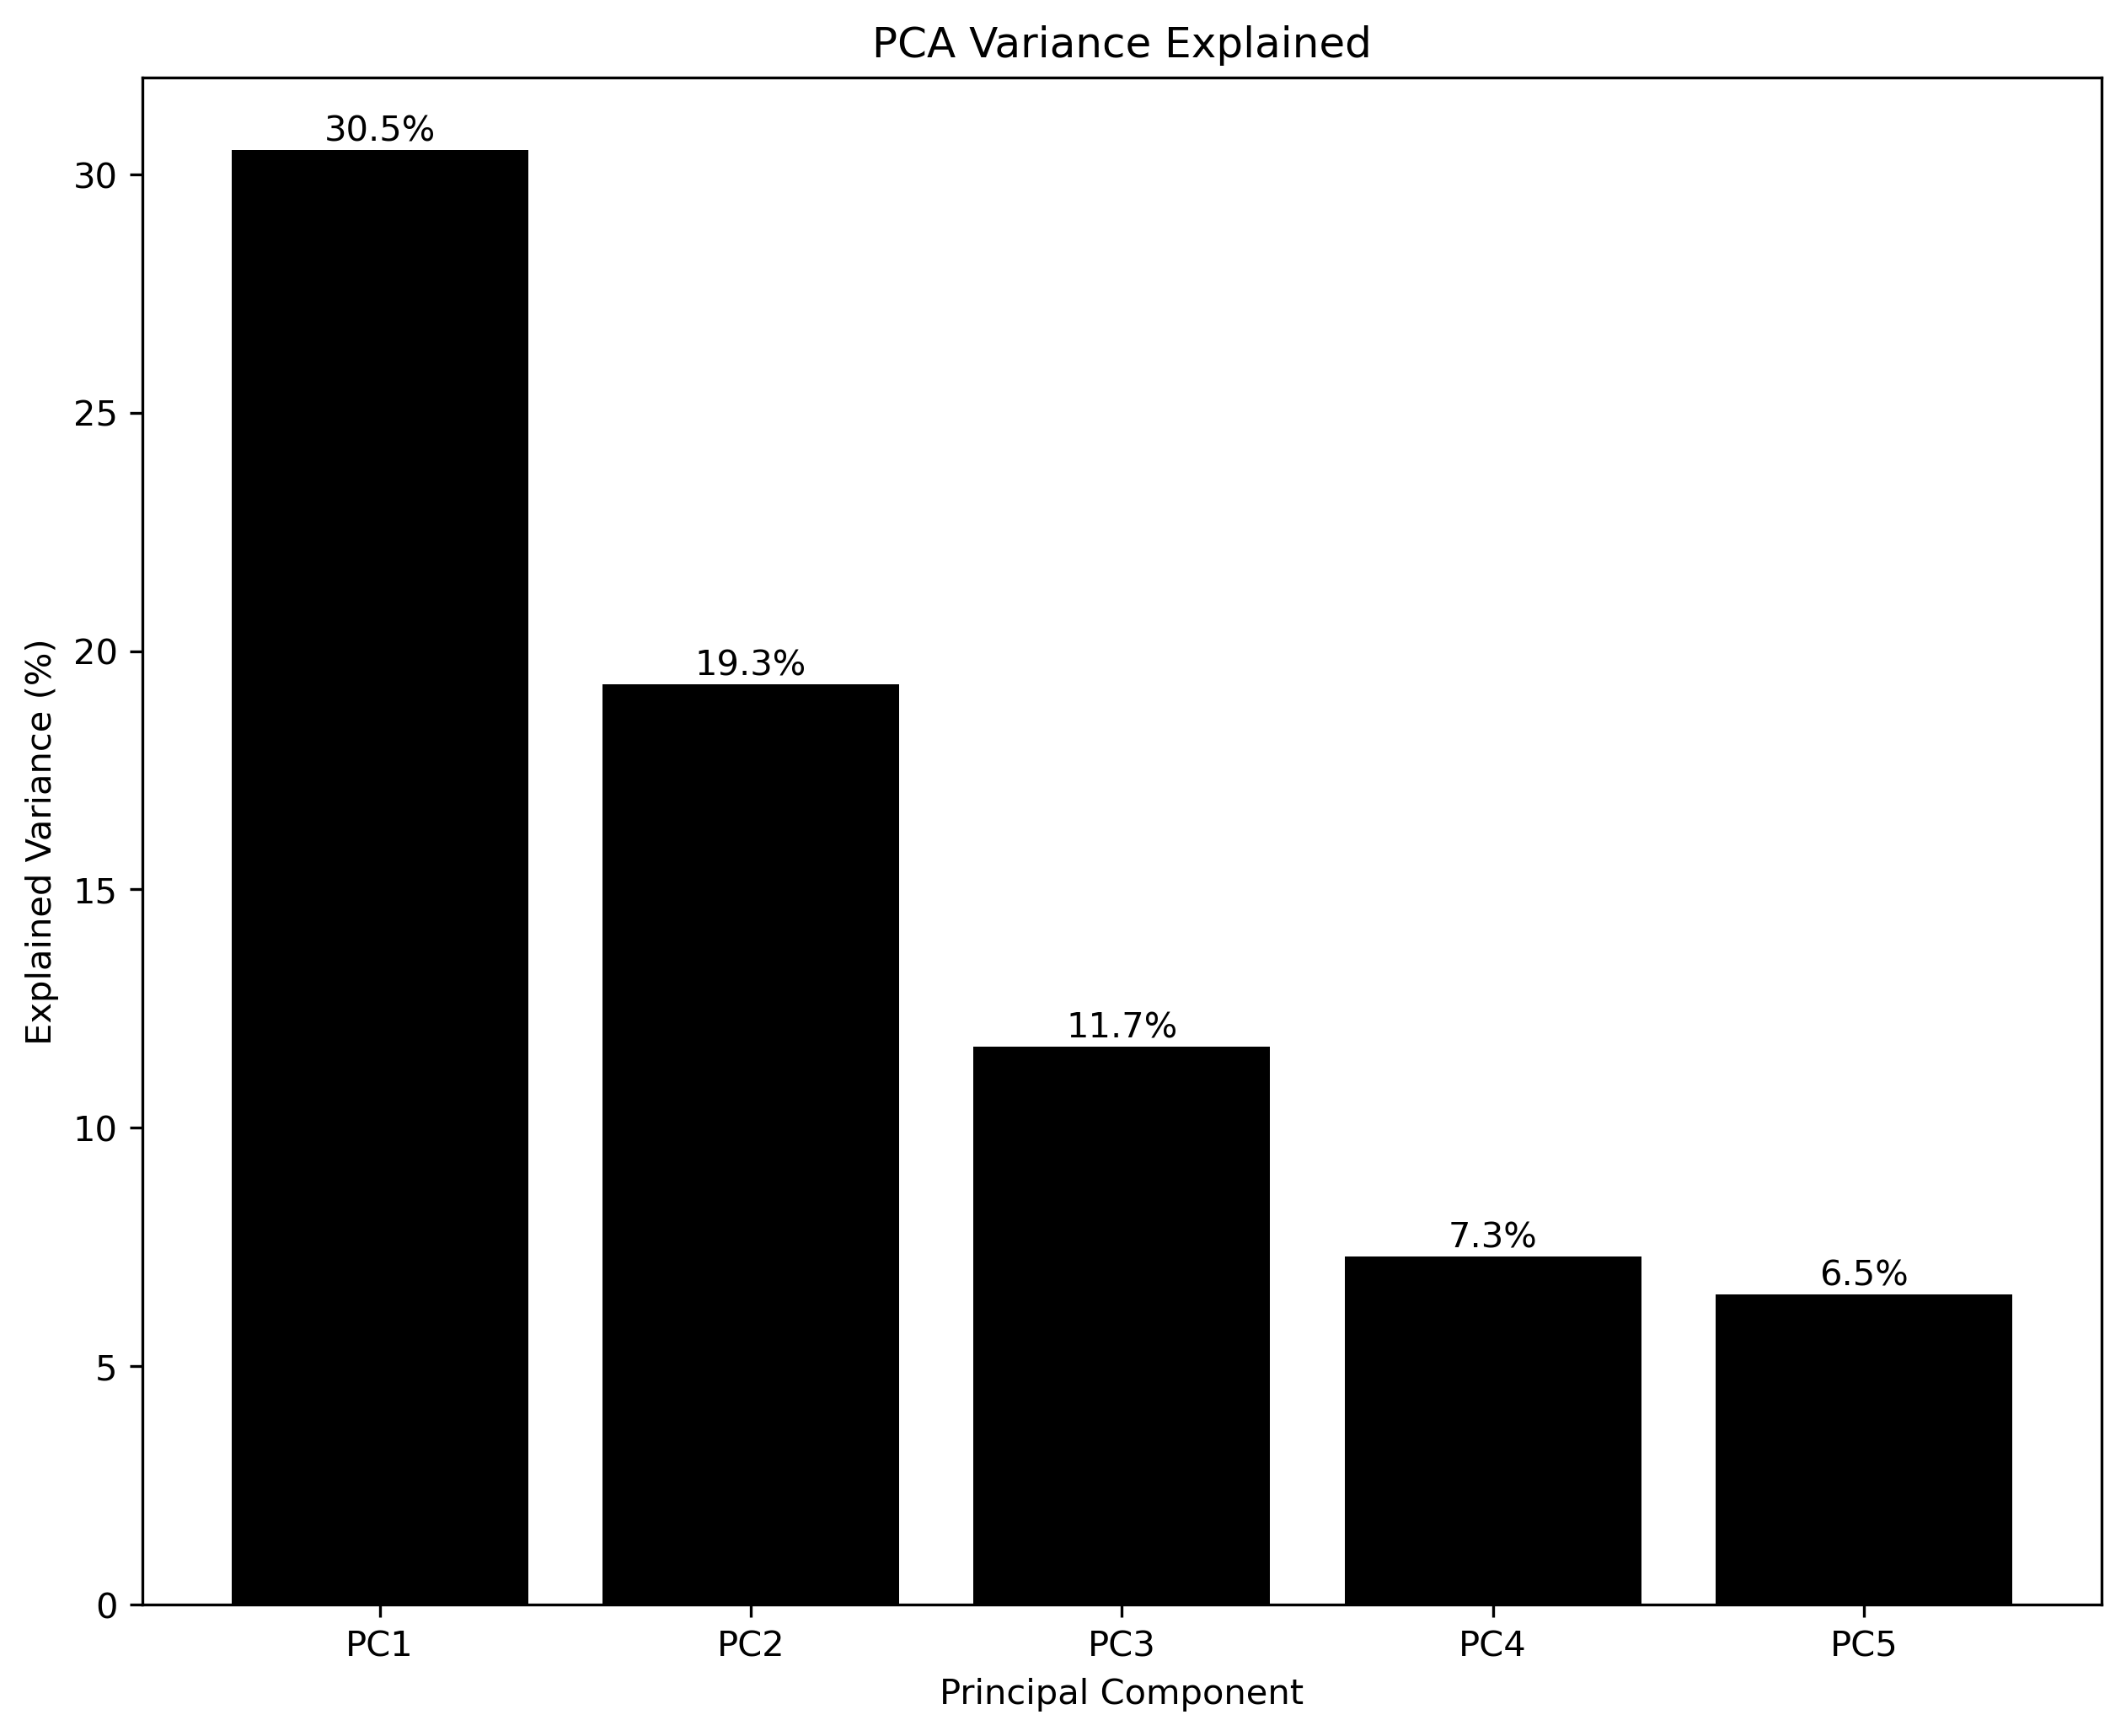

In [15]:
# Plot the explained variance on a bar chart
# Set x and y axis
x_ax=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
y_ax=pca.explained_variance_ratio_.round(3)*100

# Create a plot
plt.figure(figsize=(10,8), dpi=300)
plt.bar(x=x_ax, height=y_ax, color='black')

# Annotate chart by adding values on top of the bars
for i in range(len(x_ax)):
    plt.text(i,y_ax[i]+0.2,str(y_ax[i].round(3))+'%', ha = 'center')

# Set title for chart and axis        
plt.title(label='PCA Variance Explained', loc='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')

plt.show()

In [16]:
# Print the results
print('*************** PCA Summary ***************')
print('No. of components: ', pca.n_components_)
print('No. of samples: ', pca.n_samples_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)
print('Cumulative Explained variance ratio: ', np.cumsum(pca.explained_variance_ratio_))

*************** PCA Summary ***************
No. of components:  5
No. of samples:  142193
Explained variance ratio:  [0.30473734 0.19327251 0.11661159 0.07343159 0.06477021]
Cumulative Explained variance ratio:  [0.30473734 0.49800985 0.61462143 0.68805302 0.75282324]


In [17]:
from sklearn.linear_model import LogisticRegression # for building a logistic regression model
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from imblearn.over_sampling import RandomOverSampler # for oversampling / undersampling
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

In [20]:
df['RainTomorrowFlag'].value_counts()

0    110316
1     31877
Name: RainTomorrowFlag, dtype: int64

In [18]:
# Select data for modeling
X= X_trans
y= df['RainTomorrowFlag'].values

# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model
# Note, solvers available: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
model = LogisticRegression(solver='sag')
clf = model.fit(X_train, y_train)

# Predict class labels on a test data
LR1_pred_labels = model.predict(X_test)

# Print slope and intercept
print('Intercept (Beta 0): ', clf.intercept_)
print('Slope (Beta 1): ', clf.coef_)

Intercept (Beta 0):  [-1.7047525]
Slope (Beta 1):  [[-0.23931732  0.76922212 -0.17491182  0.00198881 -0.13041146]]


In [19]:
# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, LR1_pred_labels))

Accuracy Score:  0.8272091142445234
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.95      0.89     22067
           1       0.69      0.42      0.52      6372

    accuracy                           0.83     28439
   macro avg       0.77      0.68      0.71     28439
weighted avg       0.81      0.83      0.81     28439



# Using PCA for dimensaional reduction and then preparing a logistic regression model for this binary prediction I have a really good score of 83%.

However if you see here the number of f1-score in 1 value predictions is not good 0.52. We have unbalanced target data
where value 0, not rain tmw, has 110316 and only 31877 values for value 1, rain tmw. 